Loading /home/crop/Desktop/crop/PASTIS/DATA_S2/S2_10000.npy
array shape (43, 10, 128, 128) dtype int16


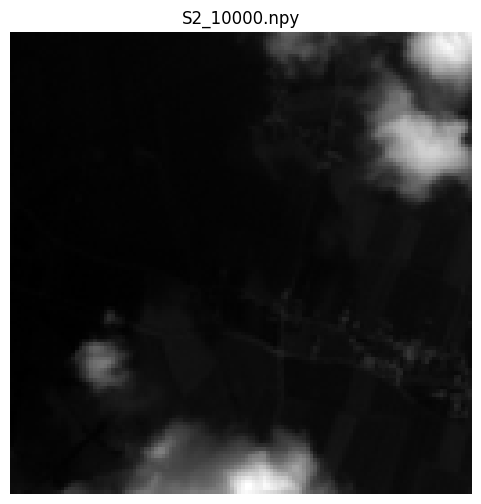

In [3]:
# Load and display the first .npy image from PASTIS/DATA_S2
import os
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = os.path.join(os.getcwd(), 'PASTIS', 'DATA_S2')
files = sorted([f for f in os.listdir(DATA_DIR) if f.endswith('.npy')])
if not files:
    print('No .npy files found in', DATA_DIR)
else:
    path = os.path.join(DATA_DIR, files[0])
    print('Loading', path)
    arr = np.load(path)
    print('array shape', arr.shape, 'dtype', arr.dtype)
    # handle 4D arrays (time, bands, H, W) -> take first time slice
    if arr.ndim == 4:
        arr = arr[0]
    # choose an image representation
    if arr.ndim == 3:
        # arr could be (bands, H, W) or (H, W, bands)
        if arr.shape[0] in (3, 4):
            img = np.transpose(arr[:3], (1, 2, 0))
        elif arr.shape[2] in (3, 4):
            img = arr[:, :, :3]
        else:
            # fallback: take first band as grayscale
            img = arr[0] if arr.shape[0] >= 1 else arr
    else:
        img = arr

    img = img.astype(float)
    vmin = img.min()
    vmax = img.max()
    if vmax > vmin:
        img = (img - vmin) / (vmax - vmin)
    else:
        img = img - vmin

    plt.figure(figsize=(6,6))
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(path))
    plt.show()

=== samples_cereal Data Structure ===
Number of features: 1

Columns: ['OBJECTID', 'tessellate', 'Name', 'Shape_Leng', 'Shape_Area', 'geometry']

Geometry type: ['MultiPolygon']

CRS (Coordinate Reference System): EPSG:4326

Bounds: [-0.86564451 34.97167973 -0.53314745 35.25219505]

=== First 5 rows ===
   OBJECTID  tessellate            Name  Shape_Leng  Shape_Area  \
0         1           1  Cereal samples    0.305506    0.000114   

                                            geometry  
0  MULTIPOLYGON (((-0.83923 34.97471, -0.8385 34....  


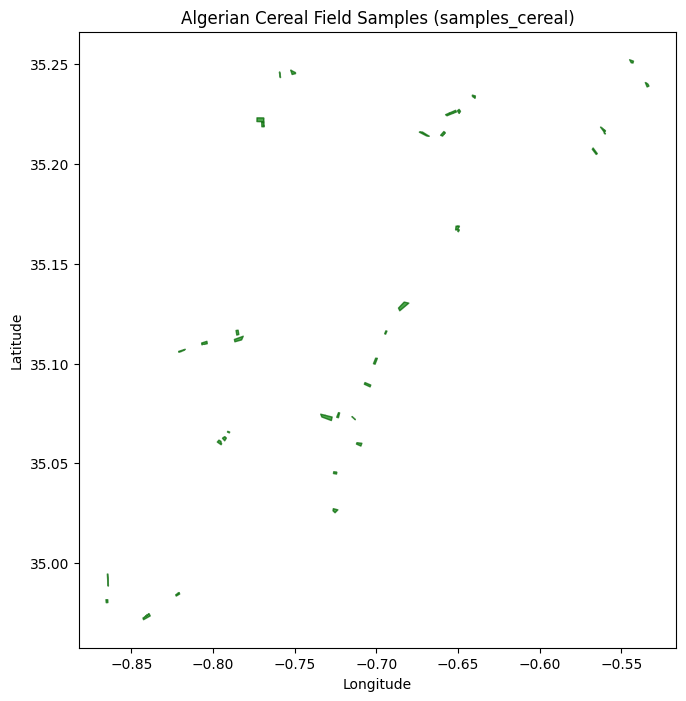

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load only samples_cereal shapefile (uses all component files: .shp, .shx, .dbf, .prj, etc.)
gdf = gpd.read_file("Samples_cereal_In-situ Algerian/Samples_cereal/samples_cereal.shp")

# Display data info
print("=== samples_cereal Data Structure ===")
print(f"Number of features: {len(gdf)}")
print(f"\nColumns: {list(gdf.columns)}")
print(f"\nGeometry type: {gdf.geometry.geom_type.unique()}")
print(f"\nCRS (Coordinate Reference System): {gdf.crs}")
print(f"\nBounds: {gdf.total_bounds}")
print(f"\n=== First 5 rows ===")
print(gdf.head())

# Plot the samples_cereal
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='green', edgecolor='darkgreen', alpha=0.7)
plt.title("Algerian Cereal Field Samples (samples_cereal)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [7]:
# Interactive map with satellite basemap using folium
import folium
import geopandas as gpd
import os

# Load all shapefiles
samples_cereal = gpd.read_file("Samples_cereal_In-situ Algerian/Samples_cereal/samples_cereal.shp")
samples_non_cereal = gpd.read_file("Samples_cereal_In-situ Algerian/Samples_cereal/samples_non_cereal.shp")
validation_cereal = gpd.read_file("Samples_cereal_In-situ Algerian/Samples_cereal/validation_cereal.shp")
validation_non_cereal = gpd.read_file("Samples_cereal_In-situ Algerian/Samples_cereal/validation_non_cereal.shp")

# Get center coordinates for the map (using all data)
all_gdf = gpd.pd.concat([samples_cereal, samples_non_cereal, validation_cereal, validation_non_cereal])
bounds = all_gdf.total_bounds  # [minx, miny, maxx, maxy]
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2

# Create a folium map with satellite imagery basemap
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=10,
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri World Imagery'
)

# Add samples_cereal (green)
folium.GeoJson(
    samples_cereal,
    name='Samples Cereal',
    style_function=lambda x: {
        'fillColor': 'lime',
        'color': 'green',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# Add samples_non_cereal (red)
folium.GeoJson(
    samples_non_cereal,
    name='Samples Non-Cereal',
    style_function=lambda x: {
        'fillColor': 'red',
        'color': 'darkred',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# Add validation_cereal (cyan)
folium.GeoJson(
    validation_cereal,
    name='Validation Cereal',
    style_function=lambda x: {
        'fillColor': 'cyan',
        'color': 'blue',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# Add validation_non_cereal (orange)
folium.GeoJson(
    validation_non_cereal,
    name='Validation Non-Cereal',
    style_function=lambda x: {
        'fillColor': 'orange',
        'color': 'darkorange',
        'weight': 2,
        'fillOpacity': 0.5
    }
).add_to(m)

# Add layer control to toggle layers
folium.LayerControl().add_to(m)

# Save to HTML file and open
output_path = "output/cereal_samples_map.html"
os.makedirs("output", exist_ok=True)
m.save(output_path)
print(f"Map saved to: {os.path.abspath(output_path)}")
print("Layers: Green=Samples Cereal, Red=Samples Non-Cereal, Cyan=Validation Cereal, Orange=Validation Non-Cereal")

Map saved to: /home/crop/Desktop/crop/output/cereal_samples_map.html
Layers: Green=Samples Cereal, Red=Samples Non-Cereal, Cyan=Validation Cereal, Orange=Validation Non-Cereal


In [8]:
# ============================================
# PASTIS Dataset Exploration
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import json
import geopandas as gpd

print("=" * 60)
print("PASTIS DATASET STRUCTURE EXPLANATION")
print("=" * 60)

# 1. Load and explain metadata.geojson
print("\n1. METADATA.GEOJSON")
print("-" * 40)
metadata = gpd.read_file("PASTIS/metadata.geojson")
print(f"   Contains: {len(metadata)} image patches")
print(f"   Columns: {list(metadata.columns)}")
print(f"\n   Sample patch info:")
print(metadata[['ID_PATCH', 'Fold', 'N_Parcel', 'Parcel_Cover', 'TILE']].head(3))

# 2. Load normalization statistics
print("\n2. NORM_S2_patch.json")
print("-" * 40)
with open("PASTIS/NORM_S2_patch.json", 'r') as f:
    norm_stats = json.load(f)
print(f"   Contains: Normalization statistics (mean/std) for each fold")
print(f"   Folds available: {list(norm_stats.keys())}")
print(f"   10 Sentinel-2 bands: B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12")

# 3. DATA_S2 - Satellite imagery
print("\n3. DATA_S2/ - Sentinel-2 Time Series Images")
print("-" * 40)
s2_sample = np.load("PASTIS/DATA_S2/S2_10000.npy")
print(f"   Shape: {s2_sample.shape}")
print(f"   Format: (Time, Bands, Height, Width)")
print(f"   - Time: {s2_sample.shape[0]} dates (satellite passes)")
print(f"   - Bands: {s2_sample.shape[1]} spectral bands")
print(f"   - Spatial: {s2_sample.shape[2]}x{s2_sample.shape[3]} pixels (128x128)")
print(f"   Dtype: {s2_sample.dtype}")

# 4. ANNOTATIONS - Parcel IDs
print("\n4. ANNOTATIONS/ - Parcel ID Maps")
print("-" * 40)
parcel_ids = np.load("PASTIS/ANNOTATIONS/ParcelIDs_10000.npy")
print(f"   Shape: {parcel_ids.shape}")
print(f"   Contains: Unique parcel IDs per pixel")
print(f"   Unique parcels: {len(np.unique(parcel_ids))} (including background=0)")

# 5. INSTANCE_ANNOTATIONS
print("\n5. INSTANCE_ANNOTATIONS/ - Per-patch Annotations")
print("-" * 40)
print("   Contains multiple annotation types:")

# Load different annotation types for patch 10000
instances = np.load("PASTIS/INSTANCE_ANNOTATIONS/INSTANCES_10000.npy")
zones = np.load("PASTIS/INSTANCE_ANNOTATIONS/ZONES_10000.npy")
heatmap = np.load("PASTIS/INSTANCE_ANNOTATIONS/HEATMAP_10421.npy")  # using available file

print(f"\n   a) INSTANCES_*.npy - Instance segmentation masks")
print(f"      Shape: {instances.shape} - Unique object IDs per pixel")
print(f"\n   b) ZONES_*.npy - Crop type semantic labels")
print(f"      Shape: {zones.shape} - Crop class per pixel")
print(f"\n   c) HEATMAP_*.npy - Edge/boundary heatmaps")
print(f"      Shape: {heatmap.shape}")

print("\n" + "=" * 60)
print("SUMMARY: PASTIS is designed for crop type classification")
print("from Sentinel-2 satellite time series in France")
print("=" * 60)

PASTIS DATASET STRUCTURE EXPLANATION

1. METADATA.GEOJSON
----------------------------------------
   Contains: 2433 image patches
   Columns: ['Fold', 'ID_PATCH', 'N_Parcel', 'Parcel_Cover', 'TILE', 'dates-S2', 'id', 'geometry']

   Sample patch info:
   ID_PATCH  Fold  N_Parcel  Parcel_Cover    TILE
0     10000     1       119      0.808032  t30uxv
1     10001     2       111      0.501986  t30uxv
2     10002     4       131      0.638722  t30uxv

2. NORM_S2_patch.json
----------------------------------------
   Contains: Normalization statistics (mean/std) for each fold
   Folds available: ['Fold_1', 'Fold_2', 'Fold_3', 'Fold_4', 'Fold_5']
   10 Sentinel-2 bands: B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12

3. DATA_S2/ - Sentinel-2 Time Series Images
----------------------------------------
   Shape: (43, 10, 128, 128)
   Format: (Time, Bands, Height, Width)
   - Time: 43 dates (satellite passes)
   - Bands: 10 spectral bands
   - Spatial: 128x128 pixels (128x128)
   Dtype: int16

4. 

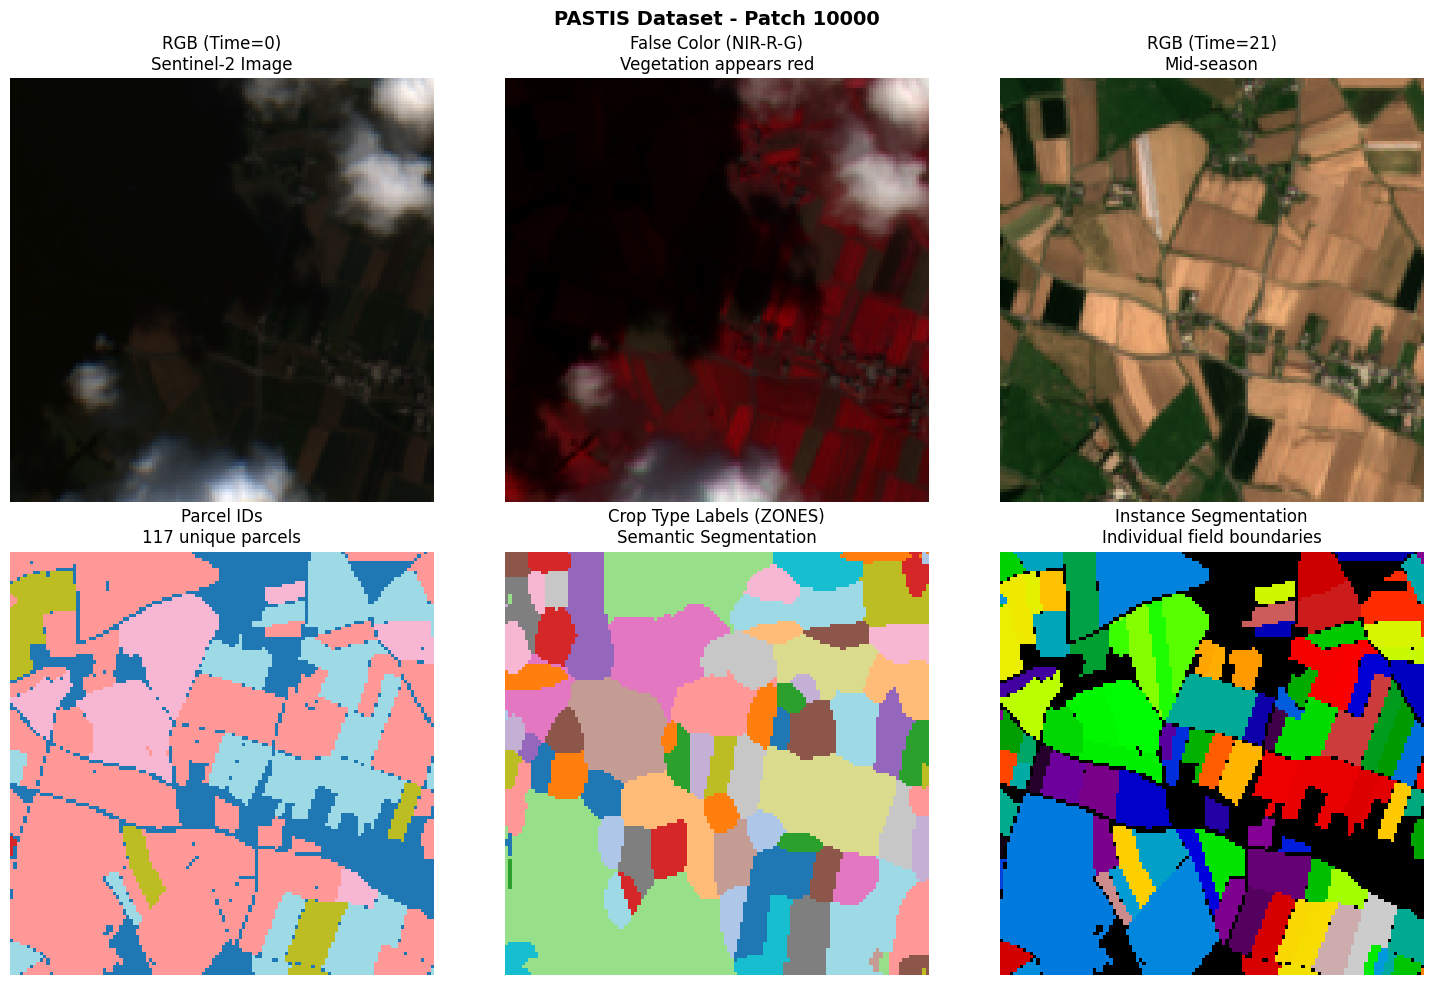


TIME SERIES EXAMPLE - Single Pixel Spectral Evolution


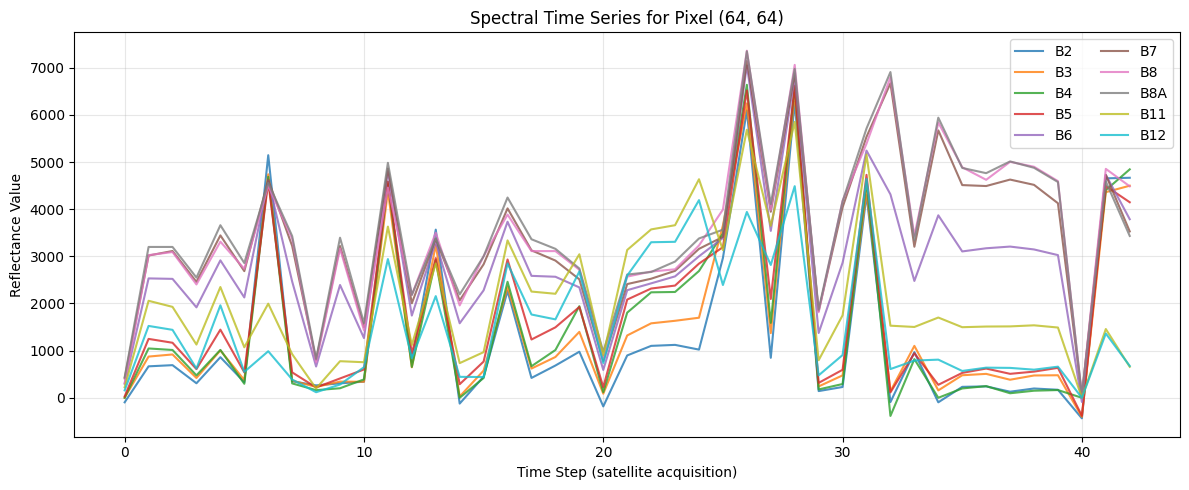

In [9]:
# ============================================
# VISUALIZE PASTIS DATA SAMPLES
# ============================================
import numpy as np
import matplotlib.pyplot as plt

patch_id = 10000

# Load data for patch
s2_data = np.load(f"PASTIS/DATA_S2/S2_{patch_id}.npy")
parcel_ids = np.load(f"PASTIS/ANNOTATIONS/ParcelIDs_{patch_id}.npy")
instances = np.load(f"PASTIS/INSTANCE_ANNOTATIONS/INSTANCES_{patch_id}.npy")
zones = np.load(f"PASTIS/INSTANCE_ANNOTATIONS/ZONES_{patch_id}.npy")

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. RGB composite (first time step) - B4, B3, B2 = indices 2, 1, 0
rgb = s2_data[0, [2, 1, 0], :, :].transpose(1, 2, 0).astype(float)
rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())  # Normalize
axes[0, 0].imshow(rgb)
axes[0, 0].set_title(f"RGB (Time=0)\nSentinel-2 Image")
axes[0, 0].axis('off')

# 2. False color (NIR, Red, Green) - B8, B4, B3 = indices 6, 2, 1
fcc = s2_data[0, [6, 2, 1], :, :].transpose(1, 2, 0).astype(float)
fcc = (fcc - fcc.min()) / (fcc.max() - fcc.min())
axes[0, 1].imshow(fcc)
axes[0, 1].set_title("False Color (NIR-R-G)\nVegetation appears red")
axes[0, 1].axis('off')

# 3. Time series - middle time step
mid_t = s2_data.shape[0] // 2
rgb_mid = s2_data[mid_t, [2, 1, 0], :, :].transpose(1, 2, 0).astype(float)
rgb_mid = (rgb_mid - rgb_mid.min()) / (rgb_mid.max() - rgb_mid.min())
axes[0, 2].imshow(rgb_mid)
axes[0, 2].set_title(f"RGB (Time={mid_t})\nMid-season")
axes[0, 2].axis('off')

# 4. Parcel IDs
im1 = axes[1, 0].imshow(parcel_ids, cmap='tab20')
axes[1, 0].set_title(f"Parcel IDs\n{len(np.unique(parcel_ids))} unique parcels")
axes[1, 0].axis('off')

# 5. Crop type zones (semantic segmentation)
im2 = axes[1, 1].imshow(zones, cmap='tab20')
axes[1, 1].set_title("Crop Type Labels (ZONES)\nSemantic Segmentation")
axes[1, 1].axis('off')

# 6. Instance segmentation
im3 = axes[1, 2].imshow(instances, cmap='nipy_spectral')
axes[1, 2].set_title("Instance Segmentation\nIndividual field boundaries")
axes[1, 2].axis('off')

plt.suptitle(f"PASTIS Dataset - Patch {patch_id}", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Time series visualization for a single pixel
print("\n" + "=" * 50)
print("TIME SERIES EXAMPLE - Single Pixel Spectral Evolution")
print("=" * 50)

fig2, ax2 = plt.subplots(figsize=(12, 5))
pixel_x, pixel_y = 64, 64  # Center pixel
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i, (band, color) in enumerate(zip(bands, colors)):
    ax2.plot(s2_data[:, i, pixel_x, pixel_y], label=band, color=color, alpha=0.8)

ax2.set_xlabel("Time Step (satellite acquisition)")
ax2.set_ylabel("Reflectance Value")
ax2.set_title(f"Spectral Time Series for Pixel ({pixel_x}, {pixel_y})")
ax2.legend(loc='upper right', ncol=2)
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()